# Week 2 - Implementation of Shaffer et al

**Due January 25 at 8 PM**

In [124]:
# This line tells matplotlib to include plots here
% matplotlib inline
import numpy as np # We'll need numpy later
import scipy as sp
import matplotlib.pyplot as plt # This lets us access the pyplot functions
plt.style.use("ggplot")

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In numpy this is a random number generator whose numbers will be chosen from the desired normal distribution by using the call `np.random.normal(loc=mu, scale=sigma, size=(n, ))`. Sample from this normal distribution from n=1 to 50 (I.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

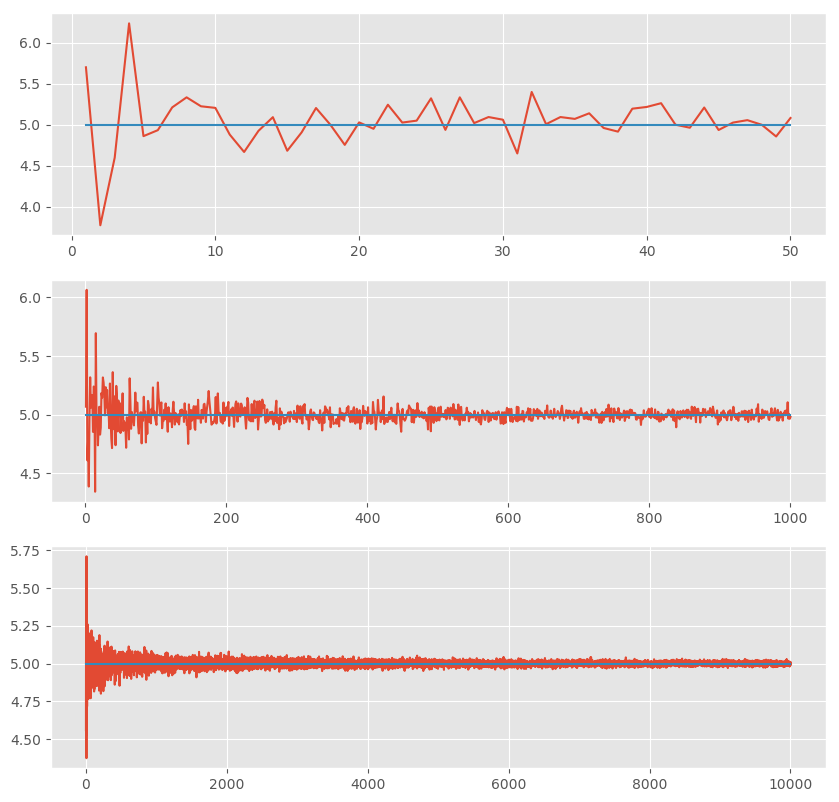

In [125]:
mu_1, sigma_1 = 5, 1
x_axis_50 = np.arange(1,51)
x_axis_1000 = np.arange(1,1001)
x_axis_10000 = np.arange(1,10001)

sample_means_list_for_50_resolution = []
for n in range(50):
    X = np.random.normal(loc = mu_1, scale = sigma_1, size = (n+1,))
    sample_means_list_for_50_resolution.append(np.mean(X))

sample_means_list_for_1000_resolution = []
for n in range(1000):
    X = np.random.normal(loc = mu_1, scale = sigma_1, size = (n+1,))
    sample_means_list_for_1000_resolution.append(np.mean(X))

sample_means_list_for_10000_resolution = []
for n in range(10000):
    X = np.random.normal(loc = mu_1, scale = sigma_1, size = (n+1,))
    sample_means_list_for_10000_resolution.append(np.mean(X))

plt.figure(1, figsize=(10, 10), dpi=100)

plt.subplot(311)
plt.plot(x_axis_50, sample_means_list_for_50_resolution)
plt.plot([1,50], [mu_1,mu_1])

plt.subplot(312)
plt.plot(x_axis_1000, sample_means_list_for_1000_resolution)
plt.plot([1,1000], [mu_1,mu_1])

plt.subplot(313)
plt.plot(x_axis_10000, sample_means_list_for_10000_resolution)
plt.plot([1,10000], [mu_1,mu_1])

plt.show()

#### (1a) Plot the standard deviation of the estimate of the sample mean versus n. Add a second line which is $1/\sqrt{n}$. Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

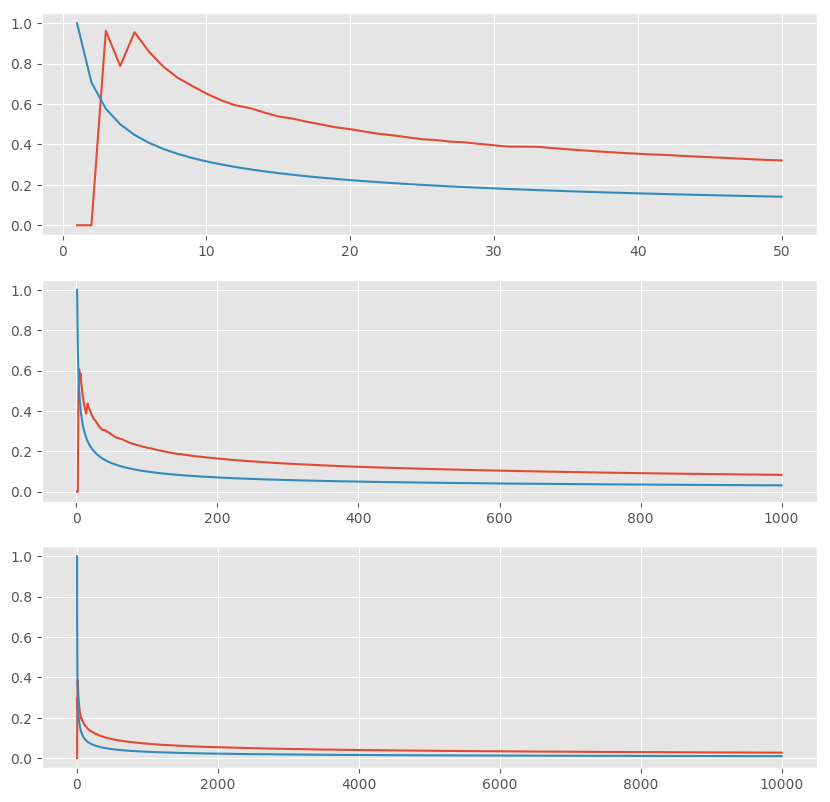

In [126]:
plt.figure(2, figsize=(10, 10), dpi=100)

sigma_list_for_sample_means_50_resolution = []
one_over_root_n_for_50 = []
for n in range(50):
    if n == 0:
        sigma_list_for_sample_means_50_resolution.append(np.std(sample_means_list_for_50_resolution[0]))
    else:
        sigma_list_for_sample_means_50_resolution.append(np.std(sample_means_list_for_50_resolution[0:n]))
    one_over_root_n_for_50.append(np.reciprocal(np.sqrt(n+1)))

    
sigma_list_for_sample_means_1000_resolution = []
one_over_root_n_for_1000 = []
for n in range(1000):
    if n == 0:
        sigma_list_for_sample_means_1000_resolution.append(np.std(sample_means_list_for_1000_resolution[0]))
    else:
        sigma_list_for_sample_means_1000_resolution.append(np.std(sample_means_list_for_1000_resolution[0:n]))
    one_over_root_n_for_1000.append(np.reciprocal(np.sqrt(n+1)))
    
sigma_list_for_sample_means_10000_resolution = []
one_over_root_n_for_10000 = []
for n in range(10000):
    if n == 0:
        sigma_list_for_sample_means_10000_resolution.append(np.std(sample_means_list_for_10000_resolution[0]))
    else:
        sigma_list_for_sample_means_10000_resolution.append(np.std(sample_means_list_for_10000_resolution[0:n]))
    one_over_root_n_for_10000.append(np.reciprocal(np.sqrt(n+1)))


plt.figure(2, figsize=(10, 10), dpi=100)
    
plt.subplot(311)
plt.plot(x_axis_50, sigma_list_for_sample_means_50_resolution)
plt.plot(x_axis_50, one_over_root_n_for_50)

plt.subplot(312)
plt.plot(x_axis_1000, sigma_list_for_sample_means_1000_resolution)
plt.plot(x_axis_1000, one_over_root_n_for_1000)

plt.subplot(313)
plt.plot(x_axis_10000, sigma_list_for_sample_means_10000_resolution)
plt.plot(x_axis_10000, one_over_root_n_for_10000)

plt.show()

#### Question from (1a): Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

As our sample size _N_ increases, our power to estimate the qualities of our distributions increases for a given experiment. The mean or the average depends on the amount of samples taken since calculating it involves dividing by the total number of observations. Thus by simply having a larger number of observations, our estimation of the mean by definition becomes more accurate. This can further be extended by saying that if we could take an infinite amount of observations, we would know the exact mean.

There is another concept known as the standard error or the standard error of the mean. Since we know there is a totoal distribution of values, and since we cannot completely observe the total distribution, we take a sample of it. The number of samples we take is _N_. The mean of this sample, as well as the variance(the average of the squared deviation from the mean) of this sample are not equivalent to the mean and the variance of the total population. The standard error then is just a measure of how our sampled means vary from the population mean.

**The sample based estimate of the mean approximates the total population mean at larger and larger _N_.**

#### (1b) Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

<function matplotlib.pyplot.show>

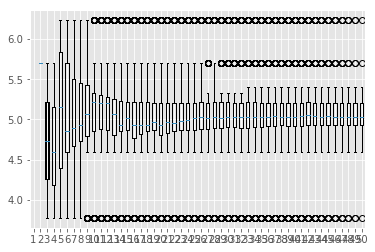

In [127]:
sample_means_list_for_50_resolution_slicer = []
for i in range(50):
    sample_means_list_for_50_resolution_slicer.append(sample_means_list_for_50_resolution[0:i])
    plt.boxplot(sample_means_list_for_50_resolution_slicer)

    
plt.figure(3, figsize=(20, 20), dpi=100)
    
plt.show

#### (1c) For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test (`sp.stats.kstest`) to see if this sample distribution is normal (hint you will need to translate this to the standard normal distribution). Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

In [4]:
# Answer to 1c here

#### (1d) Repeat 1c but for n=20. What changes when the number of samples increases?

In [5]:
# Answer to 1d here

## (2) Weibull distribution

Now we will explore sampling from an alternate distribution type.

#### (2a) Sample the Weibull distribution with parameters a = 1, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

In [6]:
# Answer 2a here

#### (2b) As in problem 1, plot a boxplot of the sample distribution of the Weibull with A=1,B=1 from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

In [7]:
# Answer 2b here

#### (2c) For n=3, plot the histogram of the sample means. What is this distribution, is it Weibull or normal? Report your test results.

In [8]:
# Answer

#### (2d) Repeat 2c and 2d for n=20 (don’t include the plots, but do include the test result for normality and explain the impact of the number of samples n, on normality).

In [9]:
# Answer

#### (2e) Repeat 2c but with A=10 and B=2 (I.e plot the histogram of the calculated sample means for 1000 trials of n=3). What is this distribution, Weibull or normal? Why does it look different than in 1c?

In [ ]:
# Answer to 2f

## (3) Differential expression

In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards.

- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

In [12]:
# Prelim code. Maybe want to write two functions that represent these distributions?

#### (3a) False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [13]:
# Answer

#### (3b) False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [54]:
# Answer

#### (3c) Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [55]:
# Answer

#### (3d) Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [60]:
# Answer

#### (3e) For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [57]:
# Answer

#### (3f) Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [59]:
# Answer

## (4) Shaffer et al implementation

In this excercise we're going to apply some basic concepts of statistics to a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

This data doesn't come from the original experiment, but rather a recent study that [applied a similar approach to study cancer cell resistance](https://www.nature.com/nature/journal/v546/n7658/abs/nature22794.html).

In [53]:
repOne = np.loadtxt("expt_rep1.csv")
repTwo = np.loadtxt("expt_rep2.csv")

#### (4a) First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

In [11]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = FILL IN  # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = FILL IN  # Previous mutants divide and add
        nCells = nCells - newMuts  # Non-resistant pop goes down by newMuts

    return nMuts

# Continue

#### (4b) Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test (`sp.stats.ks_2samp`). Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [10]:
# Answer

#### (4c) Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [50]:
# Answer

#### (4d) We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

Answer.